In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_id = "1AjPzzXDMNZGZPxpxC5qyYsg1vc5f_JD0uPceMAsbfQo"
url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"
df = pd.read_csv(url)
df.head(3)

,House ID,House Area,Number of rooms,Price
0,1,6274,8,2100
1,2,6689,5,2200
2,3,4276,8,1400


In [ ]:
x = df[["House Area", "Number of rooms"]].values
y = df["Price"].values.reshape(-1, 1)

In [ ]:
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
x = (x - x_mean) / x_std

In [ ]:
m = x.shape[0]
x = np.hstack((np.ones((m, 1)), x))

In [26]:
theta = np.zeros((x.shape[1], 1))
alpha = 0.01
iterations = 1000

In [27]:
def compute_cost(x, y, theta):
    predictions = x @ theta
    errors = predictions - y
    return (1 / (2 * len(y))) * np.sum(errors ** 2)

In [28]:
def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = []

    for _ in range(iterations):
        predictions = x @ theta
        errors = predictions - y
        gradient = (1 / len(y)) * (x.T @ errors)
        theta = theta - alpha * gradient
        cost_history.append(compute_cost(x, y, theta))
    return theta, cost_history

In [29]:
theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
theta

array([[1749.92445032],
       [ 460.2273602 ],
       [   2.2178298 ]])

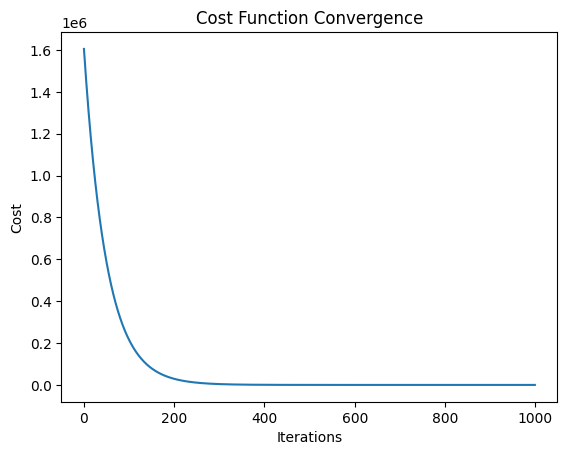

In [30]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()


In [31]:
y_pred = x @ theta
mse = np.mean((y_pred - y) ** 2)
mse

np.float64(237.09306318216625)

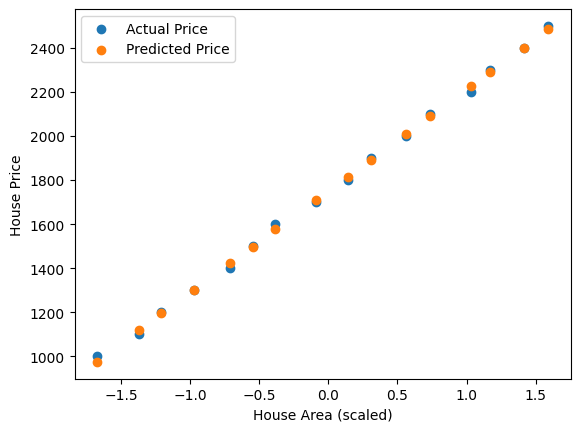

<Figure size 640x480 with 0 Axes>

In [32]:
plt.scatter(x[:, 1], y, label="Actual Price")
plt.scatter(x[:, 1], y_pred, label="Predicted Price")
plt.xlabel("House Area (scaled)")
plt.ylabel("House Price")
plt.legend()
plt.show()
plt.savefig("Actual_Price_vs_Predicted_Price.png")

In [33]:
new_house = np.array([[3000, 5]])
new_house = (new_house - x_mean) / x_std
new_house = np.hstack(([[1]], new_house))

prediction = new_house @ theta
prediction


array([[996.10966404]])

In [36]:
new_house = np.array([[10000, 10]])
new_house = (new_house - x_mean) / x_std
new_house = np.hstack(([[1]], new_house))

prediction = new_house @ theta
prediction


array([[3333.75722767]])

In [37]:
new_house = np.array([[3000, 12]])
new_house = (new_house - x_mean) / x_std
new_house = np.hstack(([[1]], new_house))

prediction = new_house @ theta
prediction


array([[1002.59277135]])